In [1]:
from plotnine import *
import pandas as pd

In [2]:
results = pd.read_csv("benchmark_results.csv", sep='\t')

In [3]:
results

,name,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,divide,core,optimizer_steps
0,1d0s,39,0.513468,0.410294,2.531669,0.5,0.05,20,10,True,mcs,100
1,1d0s,38,0.513468,0.410294,2.531669,0.1,0.01,20,10,True,mcs,100
2,1d0s,9,0.635825,0.286775,1.826495,0.5,0.01,20,10,True,mcs,100
3,1d0s,37,0.633847,0.397817,2.404023,0.5,0.01,5,10,False,mcs,100
4,1d0s,21,0.631083,0.264318,1.519318,0.5,0.01,30,10,True,mcs,100
5,1d0s,13,0.628258,0.397744,2.409978,1.0,0.01,30,10,True,mcs,20
6,2vke,501,0.634091,0.620962,2.757234,0.6,0.20,30,10,True,mcs,20
7,1odn,410,0.655052,0.572720,2.812901,0.6,0.20,30,10,True,mcs,20
8,4dko,222,0.591456,0.479384,3.275616,0.6,0.20,30,10,True,mcs,20
9,3zrc,131,0.529299,0.592550,3.314941,0.6,0.20,30,10,True,mcs,20


In [4]:
nbse_info = pd.read_csv("nbse_sets.csv")

In [5]:
nbse_info.dtypes

set_name             object
most_atoms            int64
most_bonds            int64
least_atoms           int64
least_bonds           int64
mcs_atoms             int64
num_mols              int64
avg_atoms           float64
mcs_bonds           float64
avg_atoms_to_mcs     object
dtype: object

In [6]:
data = results.merge(nbse_info, left_on=['name'], right_on=['set_name'])

In [7]:
data

,name,took,local_similarity,avg_conformer_tanimoto_dist,siena_rmsd,optimizer_coarse,optimizer_fine,num_conformers,assemblies,divide,...,set_name,most_atoms,most_bonds,least_atoms,least_bonds,mcs_atoms,num_mols,avg_atoms,mcs_bonds,avg_atoms_to_mcs
0,1d0s,39,0.513468,0.410294,2.531669,0.5,0.05,20,10,True,...,1d0s,24,26,10,10,6,12,18.833,NaN,31.86%
1,1d0s,38,0.513468,0.410294,2.531669,0.1,0.01,20,10,True,...,1d0s,24,26,10,10,6,12,18.833,NaN,31.86%
2,1d0s,9,0.635825,0.286775,1.826495,0.5,0.01,20,10,True,...,1d0s,24,26,10,10,6,12,18.833,NaN,31.86%
3,1d0s,37,0.633847,0.397817,2.404023,0.5,0.01,5,10,False,...,1d0s,24,26,10,10,6,12,18.833,NaN,31.86%
4,1d0s,21,0.631083,0.264318,1.519318,0.5,0.01,30,10,True,...,1d0s,24,26,10,10,6,12,18.833,NaN,31.86%
5,1d0s,13,0.628258,0.397744,2.409978,1.0,0.01,30,10,True,...,1d0s,24,26,10,10,6,12,18.833,NaN,31.86%
6,2vke,501,0.634091,0.620962,2.757234,0.6,0.20,30,10,True,...,2vke,42,45,31,34,22,12,33.522,NaN,65.63%
7,1odn,410,0.655052,0.572720,2.812901,0.6,0.20,30,10,True,...,1odn,30,29,18,17,15,28,24.251,NaN,61.85%
8,4dko,222,0.591456,0.479384,3.275616,0.6,0.20,30,10,True,...,4dko,30,33,23,24,15,13,26.077,NaN,57.52%
9,3zrc,131,0.529299,0.592550,3.314941,0.6,0.20,30,10,True,...,3zrc,44,47,13,13,13,13,30.308,NaN,42.89%


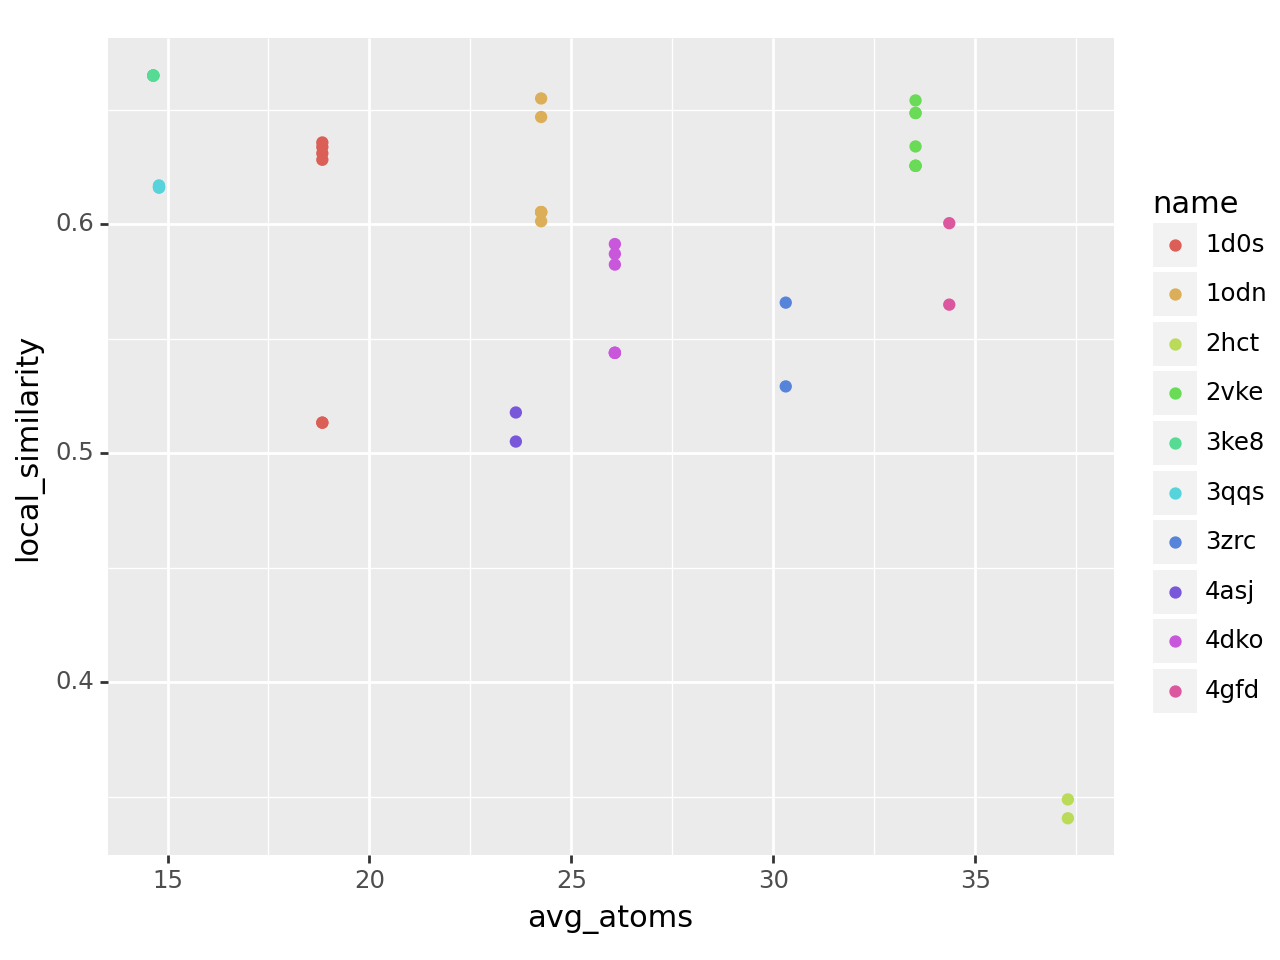

<Figure Size: (640 x 480)>

In [9]:
ggplot(data=data, mapping=aes(x='avg_atoms', y='local_similarity', colour='name')) + geom_point()